# Data Preprocessing

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def load_data(file_path):
    """Load data from a CSV file into a pandas DataFrame."""
    try:
        data = pd.read_csv(file_path, sep=';')
        print("Data loaded successfully.")
        return data
    except Exception as e:
        print(f"An error occurred while loading the data: {e}")
        return None

def summarize_data(data):
    """Generate summary statistics of the DataFrame."""
    if data is not None:
        summary = data.describe()
        print("Data summary:")
        #print(summary)
        return summary
    else:
        print("No data to summarize.")
        return None

In [28]:
data = load_data("../data/apac_data.csv")
summarize_data(data)

Data loaded successfully.
Data summary:


,EVENTS,FATALITIES,POPULATION_EXPOSURE,ID
count,197730.000000,197730.000000,9.976600e+04,197730.000000
mean,3.459632,2.036479,9.523680e+04,1538.280291
std,7.029385,9.795868,2.026675e+05,993.437542
min,1.000000,0.000000,1.000000e+00,1.000000
25%,1.000000,0.000000,1.054400e+04,593.000000
50%,1.000000,0.000000,3.482700e+04,1314.000000
75%,3.000000,0.000000,9.525400e+04,2283.000000
max,190.000000,618.000000,5.030356e+06,4157.000000


In [29]:
data.head()

,WEEK,REGION,COUNTRY,ADMIN1,EVENT_TYPE,SUB_EVENT_TYPE,EVENTS,FATALITIES,POPULATION_EXPOSURE,DISORDER_TYPE,ID,CENTROID_LATITUDE,CENTROID_LONGITUDE
0,31-dicembre-2016,Caucasus and Central Asia,Afghanistan,Badakhshan,Battles,Armed clash,6,15,NaN,Political violence,1,"36,966","73,3417"
1,07-gennaio-2017,Caucasus and Central Asia,Afghanistan,Badakhshan,Battles,Armed clash,5,28,NaN,Political violence,1,"36,966","73,3417"
2,21-gennaio-2017,Caucasus and Central Asia,Afghanistan,Badakhshan,Battles,Armed clash,1,4,NaN,Political violence,1,"36,966","73,3417"
3,04-febbraio-2017,Caucasus and Central Asia,Afghanistan,Badakhshan,Battles,Armed clash,1,4,NaN,Political violence,1,"36,966","73,3417"
4,11-febbraio-2017,Caucasus and Central Asia,Afghanistan,Badakhshan,Battles,Armed clash,4,41,NaN,Political violence,1,"36,966","73,3417"


In [30]:
data.value_counts()

WEEK             REGION                     COUNTRY      ADMIN1            EVENT_TYPE                  SUB_EVENT_TYPE                     EVENTS  FATALITIES  POPULATION_EXPOSURE  DISORDER_TYPE       ID    CENTROID_LATITUDE  CENTROID_LONGITUDE
31-ottobre-2020  Southeast Asia             Thailand     Ubon Ratchathani  Protests                    Peaceful protest                   1       0           9040.0               Demonstrations      3292  15,1537            105,1065              1
01-agosto-2020   Caucasus and Central Asia  Afghanistan  Badakhshan        Battles                     Armed clash                        1       1           32289.0              Political violence  1     36,966             73,3417               1
                                                                           Explosions/Remote violence  Shelling/artillery/missile attack  1       0           3251.0               Political violence  1     36,966             73,3417               1
             

In [31]:
print(data['EVENT_TYPE'].value_counts())

EVENT_TYPE
Protests                      77400
Violence against civilians    26894
Riots                         24619
Battles                       23503
Explosions/Remote violence    23085
Strategic developments        22229
Name: count, dtype: int64


In [32]:
print(data['SUB_EVENT_TYPE'].value_counts())

SUB_EVENT_TYPE
Peaceful protest                       67117
Attack                                 22392
Armed clash                            22307
Mob violence                           14483
Remote explosive/landmine/IED          11160
Violent demonstration                  10136
Protest with intervention               9559
Looting/property destruction            5269
Arrests                                 5023
Air/drone strike                        4752
Shelling/artillery/missile attack       4666
Disrupted weapons use                   4209
Abduction/forced disappearance          3819
Other                                   3800
Change to group/activity                2836
Grenade                                 1909
Agreement                                816
Non-state actor overtakes territory      748
Excessive force against protesters       724
Sexual violence                          683
Suicide bomb                             592
Government regains territory            

In [33]:
# pd.DataFrame(data['EVENT_TYPE'].value_counts()).to_csv('../data/event_type_counts.csv', sep=';')

In [34]:
copy_without_other = data[data['SUB_EVENT_TYPE'] != 'Other']
#copy_without_other.to_csv('../data/apac_data_no_other.csv', sep=';', index=False)

In [35]:
## Sub_event_type divided in violent/non-violent/others with percentage
sub_event_counts = pd.DataFrame(data['SUB_EVENT_TYPE'].value_counts()).reset_index()
sub_event_counts.columns = ['SUB_EVENT_TYPE', 'COUNT']
sub_event_counts['PERCENTAGE'] = sub_event_counts['COUNT'] / sub_event_counts['COUNT'].sum() * 100
#print(sub_event_counts)

"""
non_violent_types = ['Peaceful protest']

macro_event_counts = pd.DataFrame
"""

# for each sub_event_type, calculate the total of fatalities
fatalities_by_sub_event = data.groupby('SUB_EVENT_TYPE')['FATALITIES'].sum().reset_index()
fatalities_by_sub_event = fatalities_by_sub_event.sort_values(by='FATALITIES', ascending=True)
print(fatalities_by_sub_event)

                         SUB_EVENT_TYPE  FATALITIES
0        Abduction/forced disappearance           0
1                             Agreement           0
6              Change to group/activity           0
4                               Arrests           0
7                       Chemical weapon           0
13         Looting/property destruction           0
12     Headquarters or base established           0
16    Non-violent transfer of territory           0
18                     Peaceful protest           0
19            Protest with intervention           0
17                                Other         482
21                      Sexual violence         536
11                              Grenade         947
9    Excessive force against protesters        1104
8                 Disrupted weapons use        1713
24                Violent demonstration        2676
10         Government regains territory        5187
15  Non-state actor overtakes territory        5747
22    Shelli

In [36]:
non_violent_types = ['Peaceful protest', 'Protest with intervention', 'Non-violent transfer of territory', 'Agreement', 'Change to group/activity']

total_event_counts = sub_event_counts['COUNT'].sum()
other_event_counts = sub_event_counts.loc[sub_event_counts['SUB_EVENT_TYPE'] == 'Other', 'COUNT'].sum()
print(f"Total number of events: {total_event_counts}")
print(f"Number of 'Other' events: {other_event_counts}")
total_event_counts = total_event_counts - other_event_counts

# creating a new dataframe macro_event_counts with two columns: MACRO_EVENT_TYPE and COUNT
# aggregating Non-violent and Violent together
macro_event_counts = pd.DataFrame()
# sub_event_counts without 'Other' sub_event_type
new_sub_event_counts = sub_event_counts.loc[sub_event_counts['SUB_EVENT_TYPE'] != 'Other']
#print(new_sub_event_counts)

macro_event_counts['NAME'] = new_sub_event_counts['SUB_EVENT_TYPE']
macro_event_counts['MACRO_EVENT_TYPE'] = np.where(new_sub_event_counts['SUB_EVENT_TYPE'].isin(non_violent_types), 'Non-violent', 'Violent')
macro_event_counts['COUNT'] = new_sub_event_counts['COUNT']
# reset index
macro_event_counts = macro_event_counts.reset_index(drop=True)
#dropping name column
macro_event_counts = macro_event_counts.drop(columns=['NAME'])
# aggregating by MACRO_EVENT_TYPE
macro_event_counts = macro_event_counts.groupby('MACRO_EVENT_TYPE')['COUNT'].sum().reset_index()
# calculating percentage
macro_event_counts['PERCENTAGE'] = macro_event_counts['COUNT'] / total_event_counts * 100
print(macro_event_counts)

macro_event_counts.to_csv('../data/macro_event_type_counts.csv', sep=';')

Total number of events: 197730
Number of 'Other' events: 3800
  MACRO_EVENT_TYPE   COUNT  PERCENTAGE
0      Non-violent   80519    41.51962
1          Violent  113411    58.48038


In [37]:
print(data.groupby('COUNTRY')['EVENTS'].sum().sort_values(ascending=False))

COUNTRY
India                       194826
Pakistan                    108247
Myanmar                      96280
Afghanistan                  68495
South Korea                  43999
Bangladesh                   32817
Nepal                        24669
Indonesia                    23596
Philippines                  18317
China                        16941
Thailand                     13146
Japan                        13042
Sri Lanka                     8843
Taiwan                        6983
Australia                     4109
Cambodia                      2456
Malaysia                      1545
Papua New Guinea              1319
New Zealand                   1149
Mongolia                       758
Vietnam                        569
North Korea                    566
Maldives                       389
New Caledonia                  381
French Polynesia               162
East Timor                      80
Guam                            60
Laos                            54
Solomon Isla

In [38]:
print(data.groupby('COUNTRY')['POPULATION_EXPOSURE'].sum().sort_values(ascending=False))

COUNTRY
India                       2.728758e+09
Pakistan                    1.677425e+09
Myanmar                     1.219752e+09
Afghanistan                 9.092316e+08
Bangladesh                  7.227659e+08
Philippines                 4.624176e+08
China                       4.020758e+08
Indonesia                   3.822990e+08
Nepal                       3.075370e+08
South Korea                 2.838715e+08
Japan                       1.347886e+08
Taiwan                      7.605252e+07
Thailand                    5.184452e+07
Sri Lanka                   3.714124e+07
Maldives                    2.280541e+07
Australia                   1.959088e+07
Papua New Guinea            1.566540e+07
Malaysia                    1.040534e+07
New Zealand                 1.032009e+07
North Korea                 7.879911e+06
Cambodia                    7.045565e+06
Mongolia                    2.855375e+06
East Timor                  2.677160e+06
Vietnam                     1.815293e+06
New Cale

In [39]:
print(data.groupby('COUNTRY')['FATALITIES'].sum().sort_values(ascending=False))

COUNTRY
Afghanistan                 203233
Myanmar                      98367
Pakistan                     53153
Philippines                  18295
India                        13353
Bangladesh                    8150
Thailand                      3397
Indonesia                     1720
Papua New Guinea              1308
Sri Lanka                      528
Nepal                          388
Cambodia                       252
Vietnam                        147
North Korea                    139
China                          107
Malaysia                        54
Laos                            38
New Caledonia                   19
Solomon Islands                  9
Australia                        7
East Timor                       4
Japan                            1
Vanuatu                          1
Mongolia                         1
New Zealand                      1
Maldives                         1
American Samoa                   0
Cook Islands                     0
Fiji        

In [40]:
print(data.groupby('COUNTRY')[['EVENTS', 'FATALITIES']].sum().sort_values(by='EVENTS', ascending=False)[:15])

             EVENTS  FATALITIES
COUNTRY                        
India        194826       13353
Pakistan     108247       53153
Myanmar       96280       98367
Afghanistan   68495      203233
South Korea   43999           0
Bangladesh    32817        8150
Nepal         24669         388
Indonesia     23596        1720
Philippines   18317       18295
China         16941         107
Thailand      13146        3397
Japan         13042           1
Sri Lanka      8843         528
Taiwan         6983           0
Australia      4109           7


In [41]:
events_by_type = pd.DataFrame(copy_without_other.groupby('COUNTRY')['EVENTS'].sum().sort_values(ascending=False)[:15])
events_by_type['peaceful_events'] = copy_without_other[copy_without_other['FATALITIES'] == 0].groupby('COUNTRY')['EVENTS'].sum()
events_by_type['not_peaceful_events'] = events_by_type['EVENTS'] - events_by_type['peaceful_events']
events_by_type['percentage_peaceful'] = (events_by_type['peaceful_events'] / events_by_type['EVENTS']) * 100
events_by_type['percentage_not_peaceful'] = (events_by_type['not_peaceful_events'] / events_by_type['EVENTS']) * 100
print(events_by_type)


events_by_type = pd.DataFrame({
    'country': events_by_type.index,
    'total_events': events_by_type['EVENTS'].values,
    'peaceful_events': events_by_type['peaceful_events'].values,
    'not_peaceful_events': events_by_type['not_peaceful_events'].values,
    'percentage_peaceful': events_by_type['percentage_peaceful'].values,
    'percentage_not_peaceful': events_by_type['percentage_not_peaceful'].values
})

events_by_type.to_csv('../data/peaceful_events_no_other.csv', index=False)



             EVENTS  peaceful_events  not_peaceful_events  \
COUNTRY                                                     
India        193834           176816                17018   
Pakistan     108098            89380                18718   
Myanmar       93887            48702                45185   
Afghanistan   67906            16587                51319   
South Korea   43934            43934                    0   
Bangladesh    32768            23320                 9448   
Nepal         24652            24089                  563   
Indonesia     23473            22218                 1255   
Philippines   18160             5864                12296   
China         16817            16693                  124   
Thailand      13075             9991                 3084   
Japan         13008            13007                    1   
Sri Lanka      8720             8480                  240   
Taiwan         6979             6979                    0   
Australia      4095     

In [42]:
event_counts = data.groupby('COUNTRY')['EVENTS'].sum().sort_values(ascending=False)[0:15]
fatality_counts = data.groupby('COUNTRY')['FATALITIES'].sum().sort_values(ascending=False)[0:15]

In [43]:
agg = copy_without_other.groupby('COUNTRY')[['EVENTS', 'FATALITIES']].sum().sort_values(by='EVENTS', ascending=False)[:15]

aggregated_data = pd.DataFrame({
    'country': agg.index,
    'events': agg['EVENTS'].values,
    'fatalities': agg['FATALITIES'].values
})

aggregated_data.to_csv('../data/event_fatalities_no_other.csv', index=False)

In [44]:
copy_without_other['REGION'].value_counts()

REGION
South Asia                   83085
Southeast Asia               57735
Caucasus and Central Asia    24662
East Asia                    24511
Oceania                       3931
Antarctica                       6
Name: count, dtype: int64

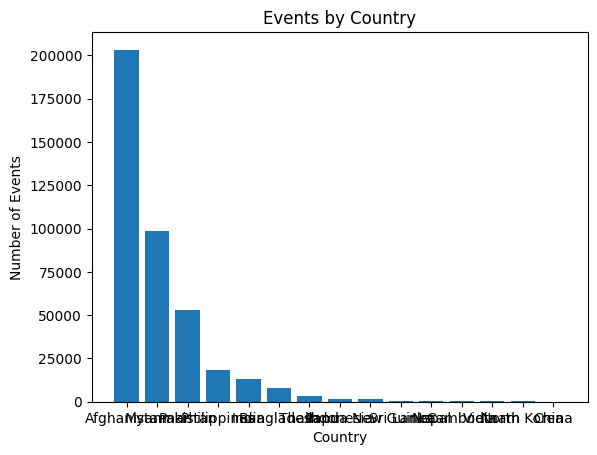

In [45]:
fig, ax = plt.subplots()
ax.bar(fatality_counts.index, fatality_counts.values)
ax.set_xlabel('Country')
ax.set_ylabel('Number of Events')
ax.set_title('Events by Country')
plt.show()

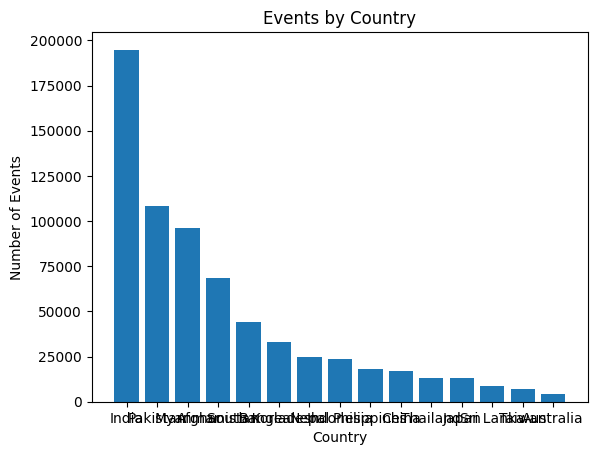

In [46]:
fig, ax = plt.subplots()
ax.bar(event_counts.index, event_counts.values)
ax.set_xlabel('Country')
ax.set_ylabel('Number of Events')
ax.set_title('Events by Country')
plt.show()

### Stacked 100% Chart Data Preparation
The data for the stacked 100% chart is prepared by aggregating event_type by the same 15 countries used in previous visualizations. The aggregation is done by counting occurrences of each event type percountry and summing up the events. The data is then normalized to represent percentages. The final dataset is saved as `event_types_percentages.csv`.

In [66]:
agg = copy_without_other.groupby('COUNTRY')['EVENTS'].sum().sort_values(ascending=False)[:15]
# divide the events into event types
event_type_counts = copy_without_other.groupby(['COUNTRY', 'EVENT_TYPE'])['EVENTS'].sum().unstack(fill_value=0)
# take only the same 15 countries as in agg
event_type_counts = event_type_counts.loc[agg.index]
# normalize to percentages
event_type_percentages = event_type_counts.div(event_type_counts.sum(axis=1), axis=0) * 100
# save to CSV
event_type_percentages.to_csv('../data/event_types_percentages.csv', sep=';')

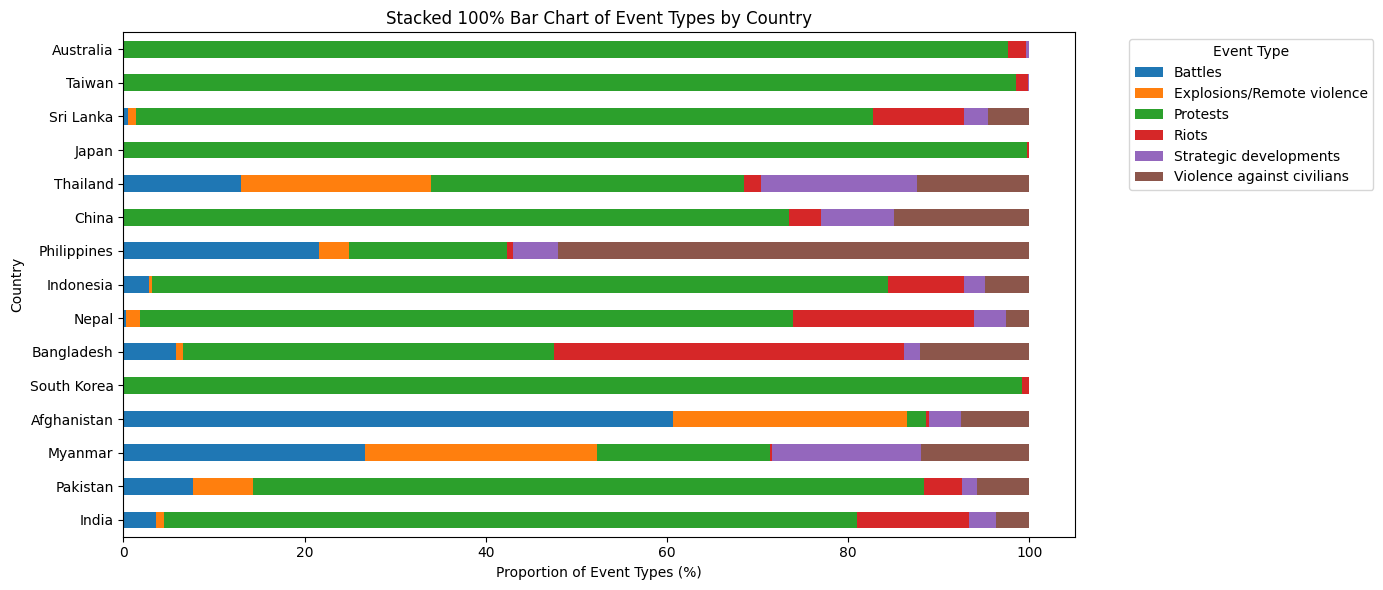

In [73]:
fig, ax = plt.subplots(figsize=(14,6), dpi=100)
event_type_percentages.plot(kind='barh', stacked=True, ax=ax)
ax.set_ylabel('Country')
ax.set_xlabel('Proportion of Event Types (%)')
ax.set_title('Stacked 100% Bar Chart of Event Types by Country')
ax.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()